In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import astropy.time
import kgpy.observatories.iris

 ChiantiPy version 0.11.0 
 found PyQt5 widgets
 using PyQt5 widgets


In [3]:
%%time
f2 = kgpy.observatories.iris.studies.f2_equatorial_scan.spectral_radiance(
    time_stop=astropy.time.Time('2022-06-01'),
    slice_day=slice(1),
)

[URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2020/01/17/20200117_221851_3620258076/iris_l2_20200117_221851_3620258076_raster.tar.gz')
 URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2020/01/17/20200117_235621_3620258076/iris_l2_20200117_235621_3620258076_raster.tar.gz')
 URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2020/01/18/20200118_013351_3620258076/iris_l2_20200118_013351_3620258076_raster.tar.gz')
 URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2020/01/24/20200124_231151_3620258076/iris_l2_20200124_231151_3620258076_raster.tar.gz')
 URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2020/01/25/20200125_004921_3620258076/iris_l2_20200125_004921_3620258076_raster.tar.gz')
 URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2020/01/25/20200125_022651_3620258076/iris_l2_20200125_022651_3620258076_raster.tar.gz')
 URL('https://www.lmsal.com/

 URL('https://www.lmsal.com/solarsoft/irisa/data_lmsal/level2_compressed/2022/05/28/20220528_014636_3620108076/iris_l2_20220528_014636_3620108076_raster.tar.gz')]
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\observatories\iris\studies\f2_equatorial_scan\data\iris_l2_20200117_221851_3620258076_raster\iris_l2_20200117_221851_3620258076_raster_t000_r00000.fits
hdu.data.shape (320, 780, 205)
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\observatories\iris\studies\f2_equatorial_scan\data\iris_l2_20200117_235621_3620258076_raster\iris_l2_20200117_235621_3620258076_raster_t000_r00000.fits
hdu.data.shape (320, 780, 205)
C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\observatories\iris\studies\f2_equatorial_scan\data\iris_l2_20200118_013351_3620258076_raster\iris_l2_20200118_013351_3620258076_raster_t000_r00000.fits
hdu.data.shape (320, 780, 205)
shape {'detector_y': 391, 'wavelength_offset': 207}
shape_kernel_final {'detector_y': 1, 'wavelength_offset': 21}
result.min() Array(array=<Quantity -400. DN>,

In [4]:
f2.output = np.nan_to_num(f2.output.mean('pointing', where=f2.output != 0))
f2.input.time = f2.input.time[dict(pointing=1)]
# f2.input.wavelength_offset = f2.input.wavelength_offset[dict(pointing=1)]
# f2.input.time = f2.input.time[dict(pointing=1)]

In [5]:
f2.input.field_y.shape

{'time': 1, 'helioprojective_y': 303}

In [6]:
f2.shape

{'time': 1,
 'raster': 1,
 'wavelength_offset': 78,
 'helioprojective_x': 909,
 'helioprojective_y': 303}

<IPython.core.display.Javascript object>


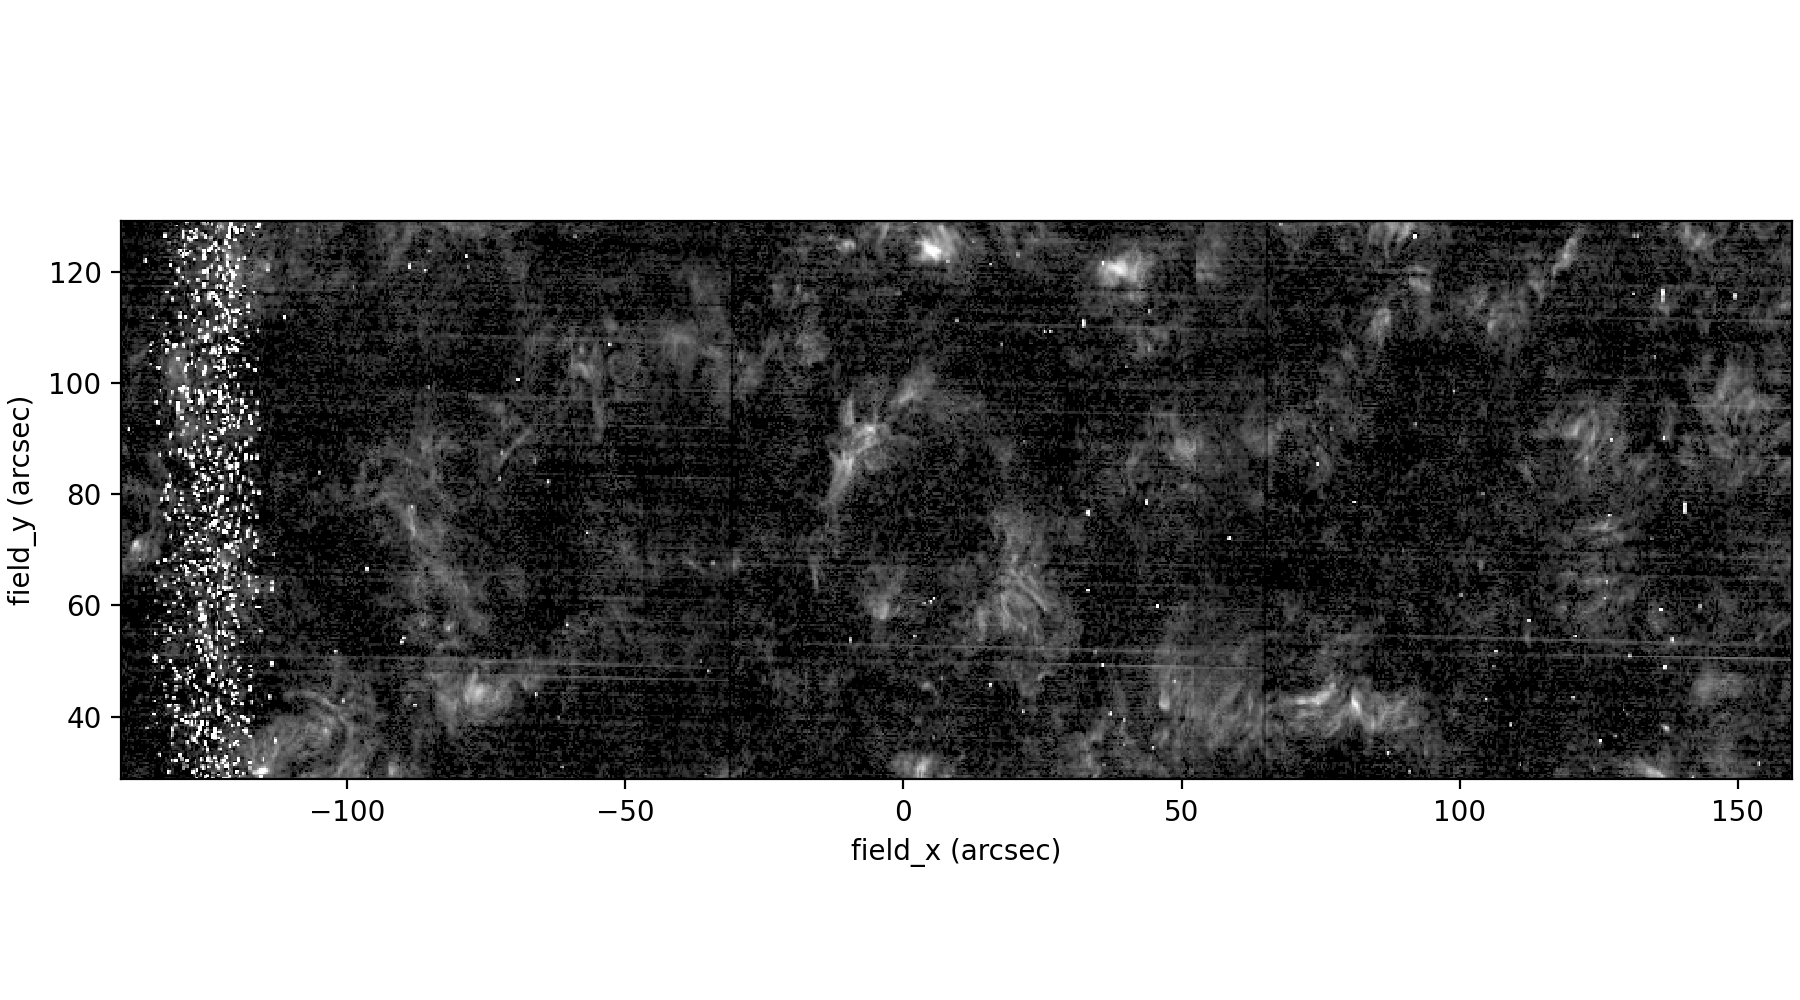

Wall time: 49 ms


In [7]:
%%time
fig, axs = plt.subplots(squeeze=False, figsize=(9,5), constrained_layout=True)
f2.pcolormesh(
    axs=axs,
    input_component_x='field_x',
    input_component_y='field_y',
    index=dict(
        time=0,
        raster=0,
#         pointing=1, 
        wavelength_offset=37,
    ),
    norm=matplotlib.colors.PowerNorm(
        0.5,
        vmin=0,
#         vmax=np.percentile(f2.output, 99.8).array.value,
        vmax=100,
    ),
    cmap='gray',
    
)
axs[0, 0].set_aspect('equal')

In [8]:
f2.output_broadcasted.shape

{'time': 1,
 'raster': 1,
 'wavelength_offset': 78,
 'helioprojective_x': 909,
 'helioprojective_y': 303}

In [9]:
f2_integrated = f2.copy_shallow()

In [10]:
f2_integrated.output = f2_integrated.output.sum('wavelength_offset')

<IPython.core.display.Javascript object>


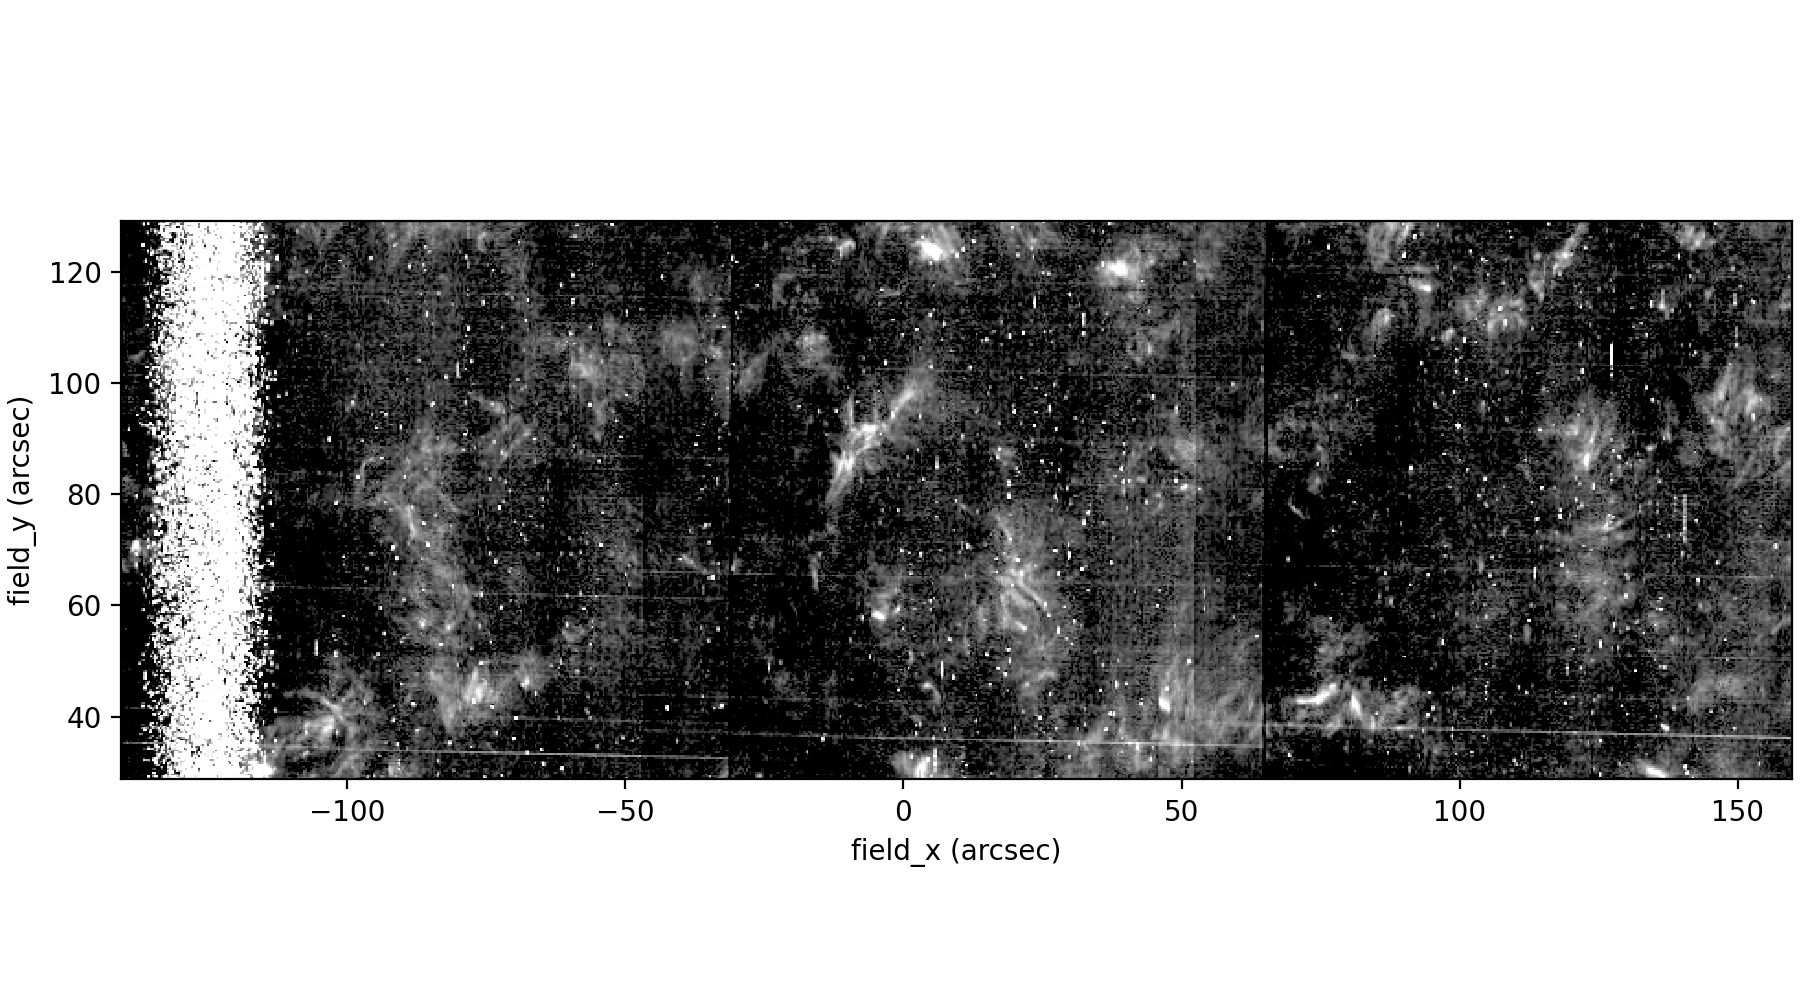

Wall time: 46 ms


In [11]:
%%time
fig, axs = plt.subplots(squeeze=False, figsize=(9,5), constrained_layout=True)
f2_integrated.pcolormesh(
    axs=axs,
    input_component_x='field_x',
    input_component_y='field_y',
    index=dict(
        time=0,
        raster=0,
#         pointing=1, 
        wavelength_offset=37,
    ),
    norm=matplotlib.colors.PowerNorm(
        0.5,
        vmin=-10,
#         vmax=np.percentile(f2.output, 99.8).array.value,
        vmax=1000,
    ),
    cmap='gray',
    
)
axs[0, 0].set_aspect('equal')

In [12]:
f2_integrated.output.sum()

Array(array=<Quantity 56042361.59981692 DN>, axes=[])